In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('Dataset.csv')

dataset['Legitimacy'].value_counts

X_train = dataset[dataset['Day'] <= 4].drop(columns=['Day', 'Legitimacy', 'ID'])  # Features for Days 0-4
y_train = dataset[dataset['Day'] <= 4]['Legitimacy']  # Target for Days 0-4
X_test = dataset[dataset['Day'] >= 5].drop(columns=['Day', 'Legitimacy', 'ID'])  # Features for Days 5-6
y_test = dataset[dataset['Day'] >= 5]['Legitimacy']  # Target for Days 5-6


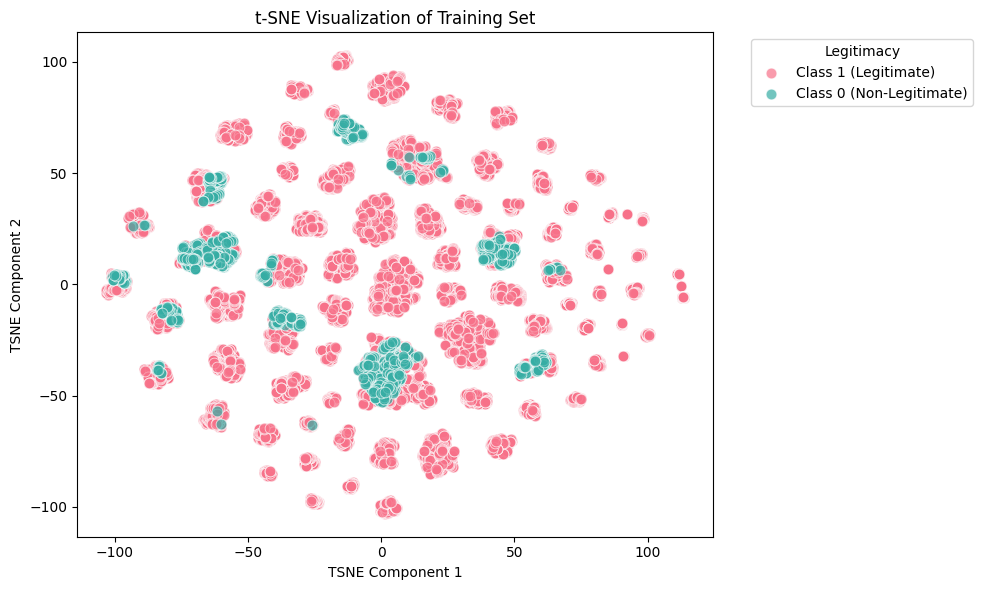

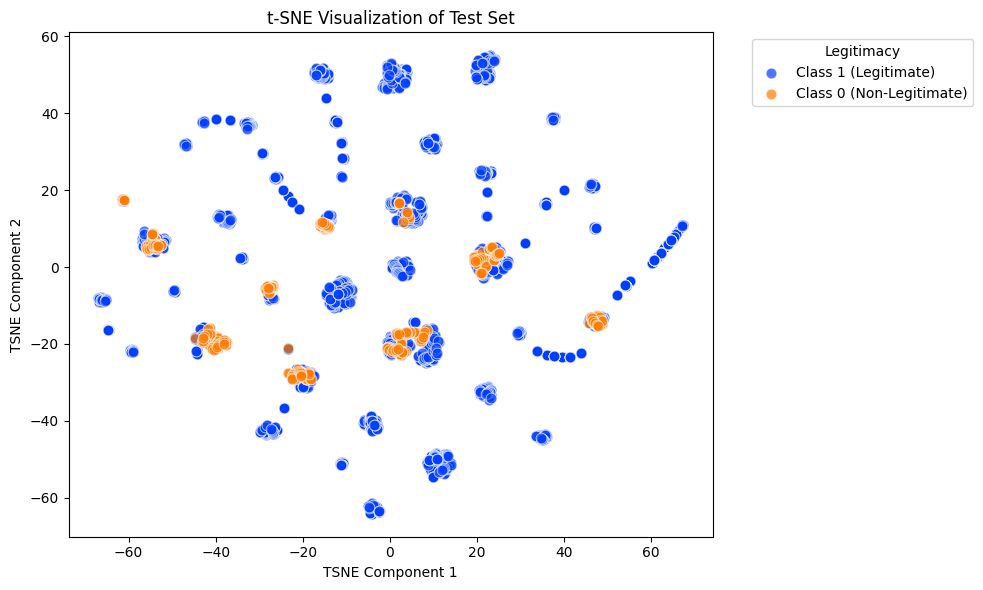

In [ ]:
def plot_tsne(X, y, title, palette, classNames):
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10, 6))
    unique_labels = sorted(pd.Series(y).unique())
    colors = sns.color_palette(palette, len(unique_labels))
    for i, label in enumerate(reversed(unique_labels)):
        subset = X_tsne[np.array(y) == label]
        if subset.shape[0] > 0:
            sns.scatterplot(x=subset[:, 0], y=subset[:, 1],
                            label=f"Class {label} ({classNames[label]})", s=60, alpha=0.7, color=colors[i])
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.title(title)
    plt.legend(title='Legitimacy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
# Class names for the target variable
classNames = {0: 'Non-Legitimate', 1: 'Legitimate'}
# t-SNE for the Training Set
plot_tsne(X_train, y_train, title='t-SNE Visualization of Training Set', palette='husl', classNames=classNames)
# t-SNE for the Test Set
plot_tsne(X_test, y_test, title='t-SNE Visualization of Test Set', palette='bright', classNames=classNames)

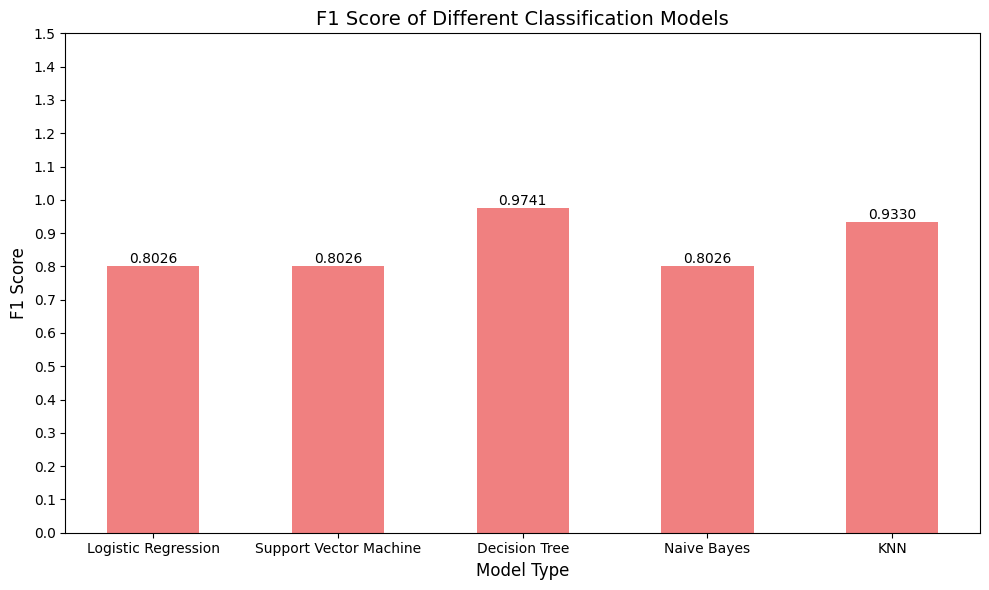

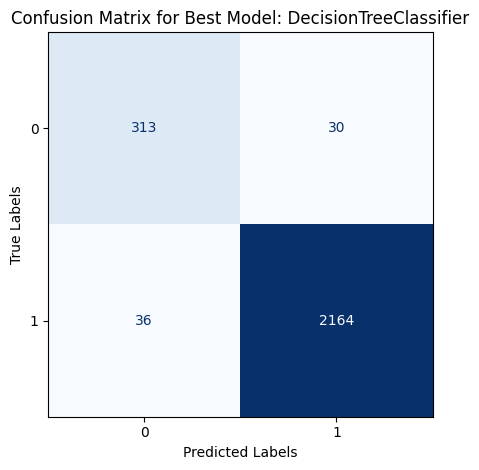

F1 Scores for All Models:
Logistic Regression: 0.8026
Support Vector Machine: 0.8026
Decision Tree: 0.9741
Naive Bayes: 0.8026
KNN: 0.9330

Top Model: DecisionTreeClassifier with F1 Score: 0.9741


In [5]:
 # Initialize the models for comparison
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Dictionary to hold F1 scores for each model
model_f1_scores = {}
top_model = None
highest_f1 = 0

# Train each model, make predictions, and evaluate using F1 score
for model_name, model in classification_models.items():
    model.fit(X_train, y_train)  # Fit model on the training data
    predictions = model.predict(X_test)  # Make predictions on the test data
    f1 = f1_score(y_test, predictions, average='weighted')  # Calculate F1 score
    model_f1_scores[model_name] = f1  # Store the F1 score for the current model

    # Update the top model if it performs better
    if f1 > highest_f1:
        highest_f1 = f1
        top_model = model
        top_model_predictions = predictions

plt.figure(figsize=(10, 6))

# Reduce bar width
bar_width = 0.5
bars = plt.bar(model_f1_scores.keys(), model_f1_scores.values(), color='lightcoral', width=bar_width)

# Set the title and axis labels
plt.title('F1 Score of Different Classification Models', fontsize=14)
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)

# Adjust ticks
plt.xticks(rotation=0, fontsize=10)  # Make model names horizontal and reduce their size
plt.yticks(fontsize=10)

# Set y-axis range and ticks
plt.ylim(0, 1.2)
plt.yticks([i * 0.1 for i in range(16)])

# Add values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Display the confusion matrix for the best-performing model with a visually appealing design
conf_matrix = confusion_matrix(y_test, top_model_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d', colorbar=False)

# Add titles and labels for clarity
plt.title(f'Confusion Matrix for Best Model: {type(top_model).__name__}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Output F1 scores of all models
print("F1 Scores for All Models:")
for model, f1 in model_f1_scores.items():
    print(f"{model}: {f1:.4f}")

# Display the best model and its F1 score
print(f"\nTop Model: {type(top_model).__name__} with F1 Score: {highest_f1:.4f}")

Question 2 -

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [7]:
# Load dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('Dataset.csv')

# Separate test dataset (Days 5-6) - this will be constant for all experiments
X_test = df[df['Day'] >= 5].drop(columns=['Day', 'Legitimacy', 'ID'])
y_test = df[df['Day'] >= 5]['Legitimacy']

# Remove the 'Day' column from training datasets
train_dataset_1 = df[df['Day'] == 0].drop(columns=['Day', 'ID'])
train_dataset_2 = df[df['Day'] <= 1].drop(columns=['Day', 'ID'])
train_dataset_3 = df[df['Day'] <= 2].drop(columns=['Day', 'ID'])
train_dataset_4 = df[df['Day'] <= 3].drop(columns=['Day', 'ID'])
train_dataset_5 = df[df['Day'] <= 4].drop(columns=['Day', 'ID'])

# Split into features and target for training sets
X_train_1, y_train_1 = train_dataset_1.drop(columns=['Legitimacy']), train_dataset_1['Legitimacy']
X_train_2, y_train_2 = train_dataset_2.drop(columns=['Legitimacy']), train_dataset_2['Legitimacy']
X_train_3, y_train_3 = train_dataset_3.drop(columns=['Legitimacy']), train_dataset_3['Legitimacy']
X_train_4, y_train_4 = train_dataset_4.drop(columns=['Legitimacy']), train_dataset_4['Legitimacy']
X_train_5, y_train_5 = train_dataset_5.drop(columns=['Legitimacy']), train_dataset_5['Legitimacy']

# List to store training sets and their labels
X_train_sets = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
y_train_sets = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5]
dataset_labels = ["Days 0", "Days 0-1", "Days 0-1-2", "Days 0-1-2-3", "Days 0-1-2-3-4"]

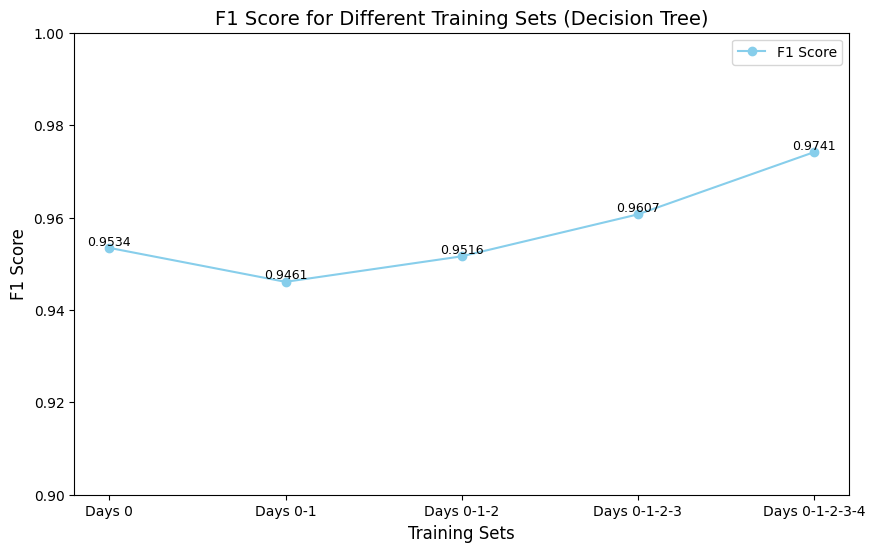

F1 Scores for each training set using Decision Tree:
Days 0: 0.9534
Days 0-1: 0.9461
Days 0-1-2: 0.9516
Days 0-1-2-3: 0.9607
Days 0-1-2-3-4: 0.9741


In [8]:
# Initialize a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)

# Initialize list to store F1 scores
f1_scores = []

# Loop over each training set, scale it, train the Decision Tree, and calculate F1 score
for X_train, y_train in zip(X_train_sets, y_train_sets):
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Plot F1 scores for each training set (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(dataset_labels, f1_scores, marker='o', color='skyblue', linestyle='-', label='F1 Score')
for i, (x, y) in enumerate(zip(dataset_labels, f1_scores)):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=9)
plt.title('F1 Score for Different Training Sets (Decision Tree)',fontsize=14)
plt.xlabel('Training Sets',fontsize=12)
plt.ylabel('F1 Score',fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Make model names horizontal and reduce their size
plt.yticks(fontsize=10)
plt.ylim([0.9, 1])
plt.legend()
plt.show()

# Print F1 scores for each dataset
print("F1 Scores for each training set using Decision Tree:")
for label, f1 in zip(dataset_labels, f1_scores):
    print(f"{label}: {f1:.4f}")



Question 3

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Step 1: Load the Dataset
data = pd.read_csv('Dataset.csv')

# Step 2: Data Preparation
features = data.columns.drop(['ID', 'Day', 'Legitimacy'])

X = data[features]
y = data['Legitimacy']

# Train-test split based on 'Day'
train_data = data[data['Day'] <= 4]
test_data = data[(data['Day'] >= 5) & (data['Day'] <= 6)]

X_train = train_data[features]
y_train = train_data['Legitimacy']

X_test = test_data[features]
y_test = test_data['Legitimacy']

# Ensure test data is not empty
if X_test.empty:
    raise ValueError("Test set is empty. Please check the 'Day' values in the dataset.")

In [55]:
# Step 3: Information Gain (Mutual Information) for Feature Selection
print("\nCalculating Information Gain...")
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)
info_gain_df = pd.DataFrame({'Feature': features, 'Information Gain': mutual_info})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)
print("\nInformation Gain (Mutual Information) Scores:")
print(info_gain_df)

# Evaluate Models with Different Number of Features using Information Gain

# Sort features based on MI scores
sorted_features_mi = info_gain_df['Feature'].tolist()

# Lists to store the number of features and corresponding F1 scores
num_features_list_mi = []
f1_scores_mi = []

print("\nEvaluating Information Gain...")
# Loop over number of features from 1 to total number
for i in range(1, len(sorted_features_mi) + 1):
    # Select top i features
    selected_features = sorted_features_mi[:i]

    # Train the model using selected features
    dt_model = DecisionTreeClassifier(random_state=0)
    dt_model.fit(X_train[selected_features], y_train)

    # Predict on test set
    y_pred = dt_model.predict(X_test[selected_features])

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    num_features_list_mi.append(i)
    f1_scores_mi.append(f1)

    print(f"Information Gain - Num Features: {i}, F1 Score: {f1:.4f}")

# Step 4: Backward Elimination (Wrapper Method)
dt_model = DecisionTreeClassifier(random_state=0)

# Initialize lists to track progress
num_features_list = []
f1_scores = []
selected_features = list(features)
best_f1 = -1
best_features = selected_features.copy()

print("\nPerforming Backward Selection...")
# Define a minimum number of features to retain to prevent empty feature set
min_features = 1

while len(selected_features) > min_features:
    current_f1 = -1
    feature_to_remove = None

    # Loop through each feature to test removal
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        dt_model.fit(X_train[temp_features], y_train)
        y_pred = dt_model.predict(X_test[temp_features])
        f1 = f1_score(y_test, y_pred, average='weighted')

        if f1 > current_f1:
            current_f1 = f1
            feature_to_remove = feature

    # Remove the least important feature
    if feature_to_remove is not None:
        selected_features.remove(feature_to_remove)
        num_features_list.append(len(selected_features))
        f1_scores.append(current_f1)
        print(f"Backward Selection - Features left: {len(selected_features)}, F1 Score: {current_f1:.4f}, Removed: {feature_to_remove}")
        # Update best features if current F1 is better
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_features = selected_features.copy()
    else:
      print("No improvement in F1 Score. Stopping Backward Selection.")
      break

best_num_features = len(best_features)
print(f"\nBest F1 Score using Backward Selection: {best_f1:.4f} with {best_features} features")
print("Selected Features using Backward Selection:", best_features)

print("\n--- Plotting F1 Scores ---")
plt.figure(figsize=(12, 7))

# Plot for Information Gain
plt.plot(num_features_list_mi, f1_scores_mi, marker='o', linestyle='-', color='blue', label='Information Gain')
for x, y in zip(num_features_list_mi, f1_scores_mi):
    plt.text(x, y, f'{y:.4f}', fontsize=10, ha='center', va='bottom', color='blue')

# Plot for Backward Selection
plt.plot(num_features_list, f1_scores, marker='s', linestyle='--', color='green', label='Backward Selection')
for x, y in zip(num_features_list, f1_scores):
    plt.text(x, y, f'{y:.4f}', fontsize=10, ha='center', va='bottom', color='green')

# Labels and title
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('F1 Score on Test Set', fontsize=14)
plt.title('Feature Selection Comparison: Information Gain vs. Backward Selection', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

max_f1_mi = max(f1_scores_mi)
best_num_features_mi = num_features_list_mi[f1_scores_mi.index(max_f1_mi)]
best_features_mi = sorted_features_mi[:best_num_features_mi]

print(f"\nBest F1 Score using Information Gain: {max_f1_mi:.4f} with {best_num_features_mi} features")
print("Selected Features:")
print(best_features_mi)

# Function to generate t-SNE plots
def generate_tsne_plots(X_train_selected, X_test_selected, y_train, y_test, title_prefix):
    # Combine training and test data for t-SNE
    combined_X = pd.concat([X_train_selected, X_test_selected], axis=0)
    combined_y = pd.concat([y_train, y_test], axis=0)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(combined_X)

    # Split the transformed data back into training and test sets
    X_tsne_train = X_tsne[:len(X_train_selected)]
    X_tsne_test = X_tsne[len(X_train_selected):]

    # Plot t-SNE for Training Set
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X_tsne_train[:,0], y=X_tsne_train[:,1], hue=y_train, palette='viridis', s=60, alpha=0.7)
    plt.title(f't-SNE Plot (Training Set) - {title_prefix} Selected Features', fontsize=16)
    plt.xlabel('TSNE Component 1', fontsize=14)
    plt.ylabel('TSNE Component 2', fontsize=14)
    plt.legend(title='Legitimacy', loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot t-SNE for Test Set
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X_tsne_test[:,0], y=X_tsne_test[:,1], hue=y_test, palette='viridis', s=60, alpha=0.7)
    plt.title(f't-SNE Plot (Test Set) - {title_prefix} Selected Features', fontsize=16)
    plt.xlabel('TSNE Component 1', fontsize=14)
    plt.ylabel('TSNE Component 2', fontsize=14)
    plt.legend(title='Legitimacy', loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

print("\n--- Generating t-SNE Plots for Information Gain Selected Features ---")
X_train_mi = X_train[best_features_mi]
X_test_mi = X_test[best_features_mi]
generate_tsne_plots(X_train_mi, X_test_mi, y_train, y_test, "Information Gain")

print("\n--- Generating t-SNE Plots for Backward Selection Selected Features ---")
if best_num_features > 0:
    X_train_bs = X_train[best_features]
    X_test_bs = X_test[best_features]
    generate_tsne_plots(X_train_bs, X_test_bs, y_train, y_test, "Backward Selection")
else:
    print("\nBackward Selection resulted in no features being selected.")




Calculating Information Gain...

Information Gain (Mutual Information) Scores:
         Feature  Information Gain
9     GridNumber          0.341250
1      Longitude          0.253891
0       Latitude          0.244318
2           Hour          0.079207
6      Resources          0.044406
8    OnPeakHours          0.031451
7       Coverage          0.014473
4       Duration          0.009188
5  RemainingTime          0.004154
3         Minute          0.000000

Evaluating Information Gain...
Information Gain - Num Features: 1, F1 Score: 0.9808
Information Gain - Num Features: 2, F1 Score: 0.9789


KeyboardInterrupt: 

Question 4

In [12]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=515a949110f64c949ccd87bfa70c411163b37fb0caff7d36bd6c3b5eb01194ab
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Non-PKI (Base Model) Results:
Random Forest: F1 = 0.987
Decision Tree: F1 = 0.989
XGBoost: F1 = 0.993
KNN: F1 = 0.950

PKI Results by Grid Size:

Grid Size 2x2:
Random Forest: F1 = 0.991
Decision Tree: F1 = 0.989
XGBoost: F1 = 0.993
KNN: F1 = 0.949

Grid Size 3x3:
Random Forest: F1 = 0.994
Decision Tree: F1 = 0.990
XGBoost: F1 = 0.993
KNN: F1 = 0.949

Grid Size 4x4:
Random Forest: F1 = 0.993
Decision Tree: F1 = 0.989
XGBoost: F1 = 0.994
KNN: F1 = 0.946

Grid Size 5x5:
Random Forest: F1 = 0.995
Decision Tree: F1 = 0.989
XGBoost: F1 = 0.992
KNN: F1 = 0.942


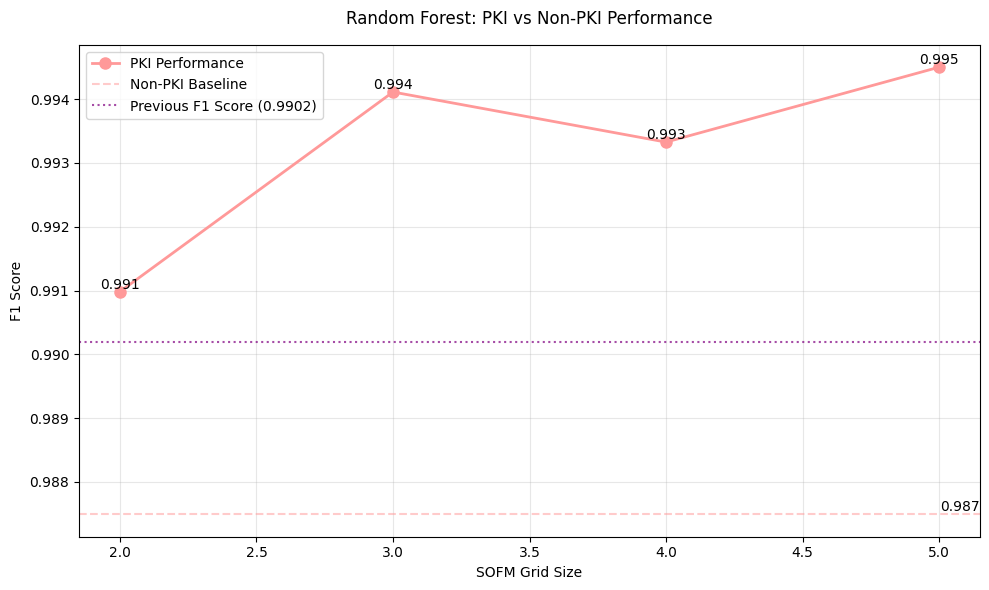


Random Forest Performance Summary:
Non-PKI Score: 0.987
Best PKI Score: 0.995 (Grid Size: 5x5)
Improvement: +0.71%


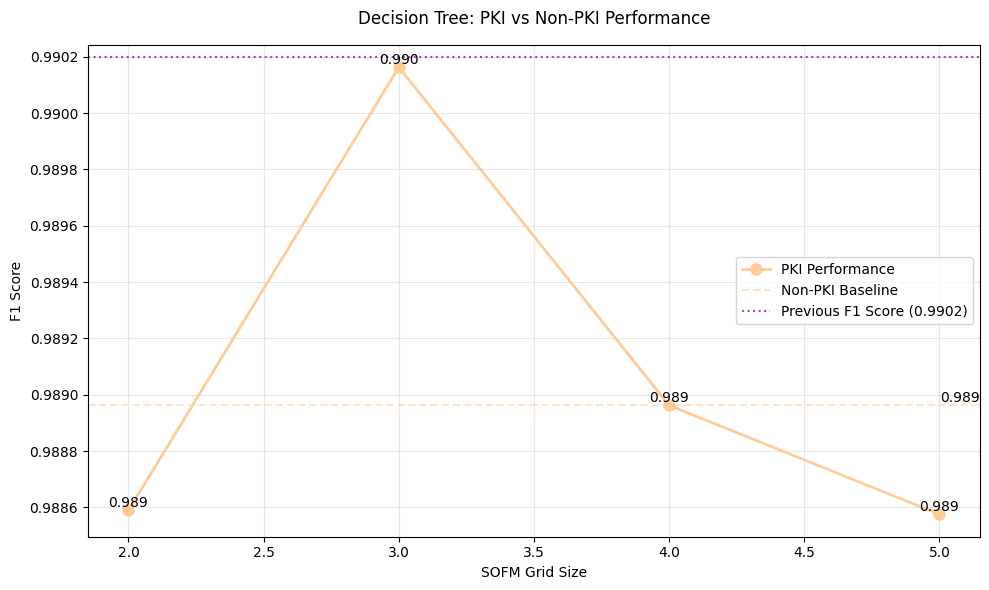


Decision Tree Performance Summary:
Non-PKI Score: 0.989
Best PKI Score: 0.990 (Grid Size: 3x3)
Improvement: +0.12%


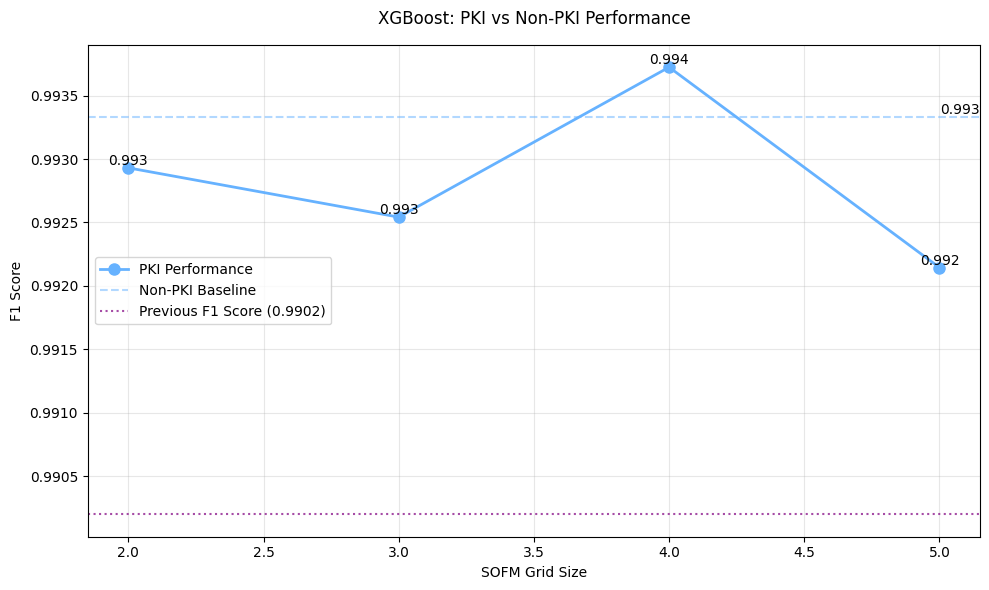


XGBoost Performance Summary:
Non-PKI Score: 0.993
Best PKI Score: 0.994 (Grid Size: 4x4)
Improvement: +0.04%


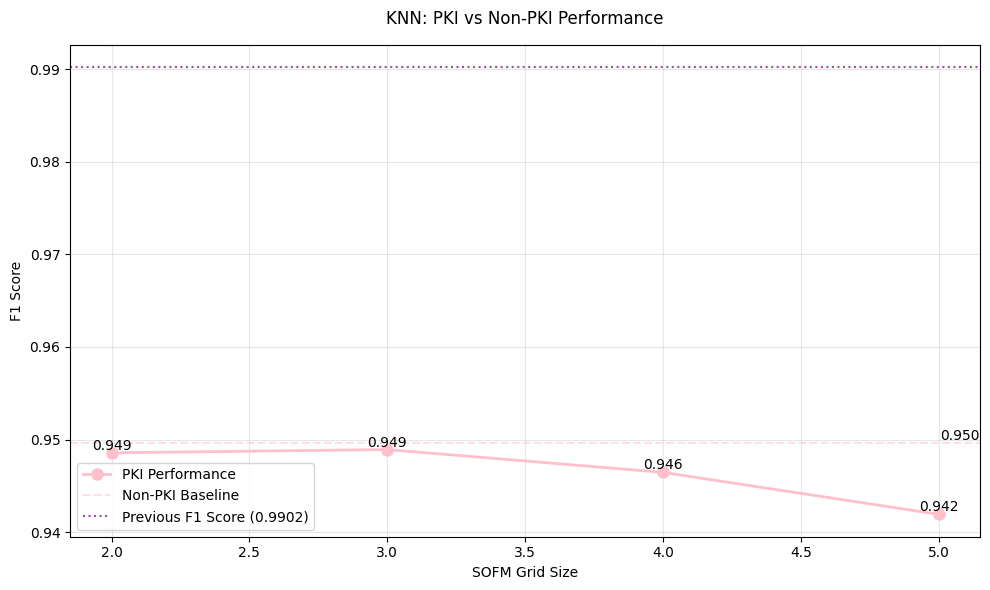


KNN Performance Summary:
Non-PKI Score: 0.950
Best PKI Score: 0.949 (Grid Size: 3x3)
Improvement: -0.07%


In [30]:
dataset = pd.read_csv('Dataset.csv')

# Define the target variable
y = data['Legitimacy']

selected_features = ['Longitude', 'Latitude', 'Hour']  # Replace with actual selected features from Q3
best_features = ['Longitude', 'Latitude']
X = data[selected_features]
X_best = data[best_features]

# Split the data based on 'Day' column
train_data = data[data['Day'] <= 4]
test_data = data[(data['Day'] >= 5) & (data['Day'] <= 6)]

X_train = train_data[selected_features]
X_best_train = train_data[best_features]
y_train = train_data['Legitimacy']

X_test = test_data[selected_features]
X_best_test = test_data[best_features]
y_test = test_data['Legitimacy']


# Function to initialize models
def initialize_models():
    return {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
        "Decision Tree": DecisionTreeClassifier(random_state=0),
        "XGBoost": XGBClassifier(n_estimators=100, random_state=0),
        "KNN": KNeighborsClassifier(n_neighbors=5),
    }

# Function to create and train SOFM
def train_sofm(X_best_train, grid_size):
    if isinstance(X_best_train, pd.DataFrame):
      X_best_train = X_best_train.values
    input_dim = X_best_train.shape[1]
    sofm = MiniSom(grid_size, grid_size, input_dim, sigma=1.0, learning_rate=0.5, random_seed=0)
    sofm.random_weights_init(X_best_train)
    sofm.train_random(X_best_train, 1000)
    return np.array([sofm.winner(x) for x in X_best_train]), sofm

# Function to train and evaluate a PKI-enhanced model
def train_pki_models(X_train, X_best_train, y, sofm_grid_size):
    sofm_features, sofm = train_sofm(X_best_train, sofm_grid_size)
    X_pki = np.hstack((X_train, sofm_features))
    models = initialize_models()

    for name, model in models.items():
        model.fit(X_pki, y)

    return models, sofm

# Function to make predictions using PKI models
def predict_with_pki(models, sofm, X_test, X_best_test):
    if isinstance(X_best_test, pd.DataFrame):
      X_best_test = X_best_test.values
    sofm_features = np.array([sofm.winner(x) for x in X_best_test])
    X_pki = np.hstack((X_test, sofm_features))

    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(X_pki)
    return predictions

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, X_best_train, X_best_test):
    grid_sizes = [2, 3, 4, 5]
    results = {"Non-PKI": {}, "PKI": {}}

    # Train and evaluate base models
    base_models = initialize_models()
    for name, model in base_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results["Non-PKI"][name] = f1_score(y_test, y_pred, average="weighted")

    # Train and evaluate PKI models
    for size in grid_sizes:
        models, sofm = train_pki_models(X_train, X_best_train, y_train, size)
        predictions = predict_with_pki(models, sofm, X_test, X_best_test)
        results["PKI"][size] = {name: f1_score(y_test, pred, average="weighted") for name, pred in predictions.items()}

    return results

# Function to plot results
def plot_results(results):
    model_names = ["Random Forest", "Decision Tree", "XGBoost", "KNN"]
    colors = ["#FF9999", "#FFCC99", "#66B2FF", "#FFC0CB"]
    previous_f1_score = 0.9902  # Previous F1 score

    for idx, model_name in enumerate(model_names):
        plt.figure(figsize=(10, 6))

        # Extract scores for the current model
        pki_scores = [results["PKI"][size][model_name] for size in results["PKI"].keys()]
        non_pki_score = results["Non-PKI"][model_name]

        # Plot PKI and baseline scores
        plt.plot(list(results["PKI"].keys()), pki_scores, marker="o", color=colors[idx], linewidth=2, markersize=8, label="PKI Performance")
        plt.axhline(y=non_pki_score, color=colors[idx], linestyle="--", alpha=0.5, label="Non-PKI Baseline")
        plt.axhline(y=previous_f1_score, color="purple", linestyle=":", alpha=0.7, label="Previous F1 Score (0.9902)")

        # Add annotations
        for i, score in enumerate(pki_scores):
            plt.text(list(results["PKI"].keys())[i], score, f"{score:.3f}", ha="center", va="bottom")
        plt.text(plt.xlim()[1], non_pki_score, f"{non_pki_score:.3f}", ha="right", va="bottom")

        # Customize plot
        plt.title(f"{model_name}: PKI vs Non-PKI Performance", fontsize=12, pad=15)
        plt.xlabel("SOFM Grid Size", fontsize=10)
        plt.ylabel("F1 Score", fontsize=10)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        best_pki_score = max(pki_scores)
        best_grid_size = list(results["PKI"].keys())[pki_scores.index(best_pki_score)]
        improvement = ((best_pki_score - non_pki_score) / non_pki_score) * 100

        print(f"\n{model_name} Performance Summary:")
        print(f"Non-PKI Score: {non_pki_score:.3f}")
        print(f"Best PKI Score: {best_pki_score:.3f} (Grid Size: {best_grid_size}x{best_grid_size})")
        print(f"Improvement: {improvement:+.2f}%")

results = evaluate_models(X_train, y_train, X_test, y_test, X_best_train, X_best_test)

print("\nNon-PKI (Base Model) Results:")
for model, score in results["Non-PKI"].items():
    print(f"{model}: F1 = {score:.3f}")

print("\nPKI Results by Grid Size:")
for size in results["PKI"]:
    print(f"\nGrid Size {size}x{size}:")
    for model, score in results["PKI"][size].items():
        print(f"{model}: F1 = {score:.3f}")

plot_results(results)


Question 5

In [18]:
!pip install minisom


Evaluating parameter: max_depth
max_depth = 5, F1 Score = 0.929
max_depth = 10, F1 Score = 0.991
max_depth = 15, F1 Score = 0.993


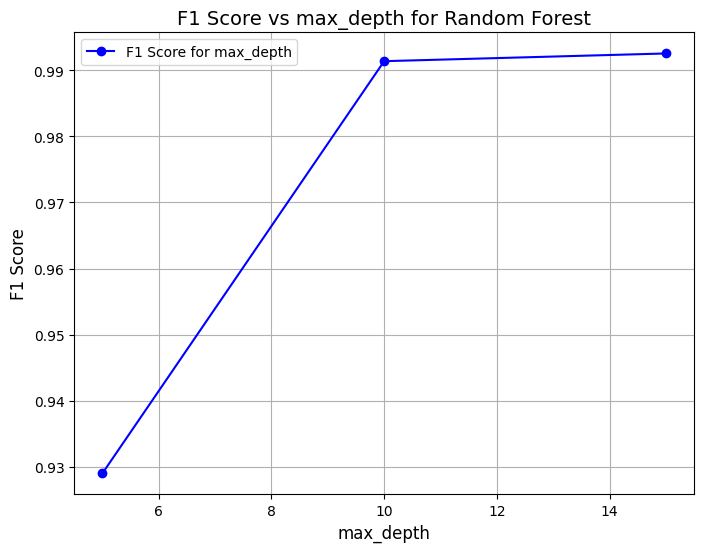


Evaluating parameter: num_round
num_round = 50, F1 Score = 0.965
num_round = 100, F1 Score = 0.974
num_round = 150, F1 Score = 0.975
num_round = 200, F1 Score = 0.975
num_round = 250, F1 Score = 0.975


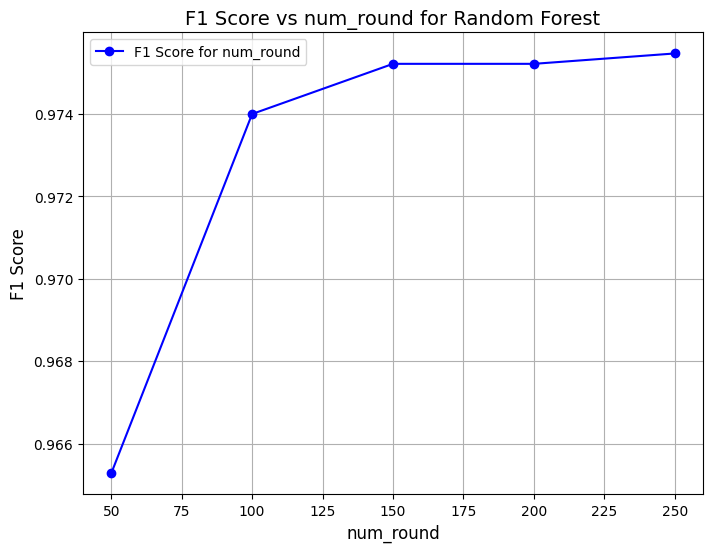

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from minisom import MiniSom
import random

# Load Dataset
dataset = pd.read_csv('Dataset.csv')

# Define the target variable
y = dataset['Legitimacy']

selected_features = ['Longitude', 'Latitude', 'Hour']  # Replace with actual selected features from Q3
best_features = ['Longitude', 'Latitude']
X = dataset[selected_features]
X_best = dataset[best_features]

# Split the data based on 'Day' column
train_data = dataset[dataset['Day'] <= 4]
test_data = dataset[(dataset['Day'] >= 5) & (dataset['Day'] <= 6)]

X_train = train_data[selected_features]
X_best_train = train_data[best_features]
y_train = train_data['Legitimacy']

X_test = test_data[selected_features]
X_best_test = test_data[best_features]
y_test = test_data['Legitimacy']

# Function to train SOFM
def train_sofm(X_best_train, grid_size):
    input_dim = X_best_train.shape[1]
    sofm = MiniSom(grid_size, grid_size, input_dim, sigma=1.0, learning_rate=0.5, random_seed=0)
    sofm.random_weights_init(X_best_train.values)
    sofm.train_random(X_best_train.values, 1000)

    # Generate features for both training and test data
    train_sofm_features = np.array([sofm.winner(x) for x in X_best_train.values])
    return train_sofm_features, sofm

# Modify how features are concatenated in the RandomForest evaluation function
def evaluate_random_forest(param_name, param_values):
    f1_scores = []
    print(f"\nEvaluating parameter: {param_name}")
    for value in param_values:
        params = {"n_estimators": 100, "random_state": 0, "max_depth": 6}
        if param_name == "num_round":
            params["n_estimators"] = value
        else:
            params[param_name] = value

        model = RandomForestClassifier(**params)

        # Train SOFM and PKI-enhanced model
        sofm_features, sofm = train_sofm(X_best_train, 4)

        # Concatenate SOFM features to both the training and test sets
        X_pki_train = np.hstack((X_train.values, sofm_features))
        X_pki_test = np.hstack((X_test.values, np.array([sofm.winner(x) for x in X_best_test.values])))

        # Fit and predict
        model.fit(X_pki_train, y_train)
        y_pred = model.predict(X_pki_test)

        # Calculate F1 score
        score = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(score)
        print(f"{param_name} = {value}, F1 Score = {score:.3f}")

    return param_values, f1_scores


# Plot results
def plot_results(param_name, param_values, f1_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(param_values, f1_scores, marker='o', color='b', label=f'F1 Score for {param_name}')
    plt.title(f"F1 Score vs {param_name} for Random Forest", fontsize=14)
    plt.xlabel(param_name, fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Define parameters to fine-tune
param_ranges = {
    "max_depth": [5, 10, 15],  # Lower, default, higher values
    "num_round": [50, 100, 150, 200, 250],  # Lower, default, higher values
}

# Fine-tuning for each parameter
for param_name, param_values in param_ranges.items():
    values, scores = evaluate_random_forest(param_name, param_values)
    plot_results(param_name, values, scores)



Evaluating parameter: max_depth
max_depth = 3, F1 Score = 0.991
max_depth = 6, F1 Score = 0.994
max_depth = 9, F1 Score = 0.994


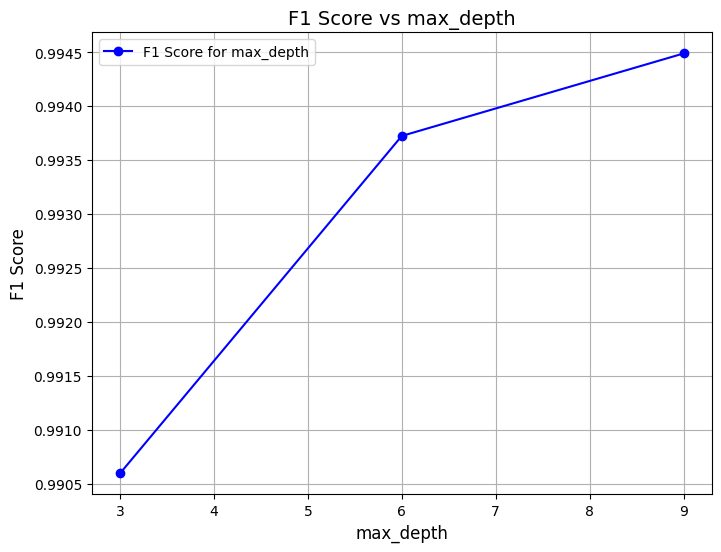


Evaluating parameter: num_round
num_round = 50, F1 Score = 0.989
num_round = 100, F1 Score = 0.994
num_round = 150, F1 Score = 0.993
num_round = 200, F1 Score = 0.993
num_round = 250, F1 Score = 0.992


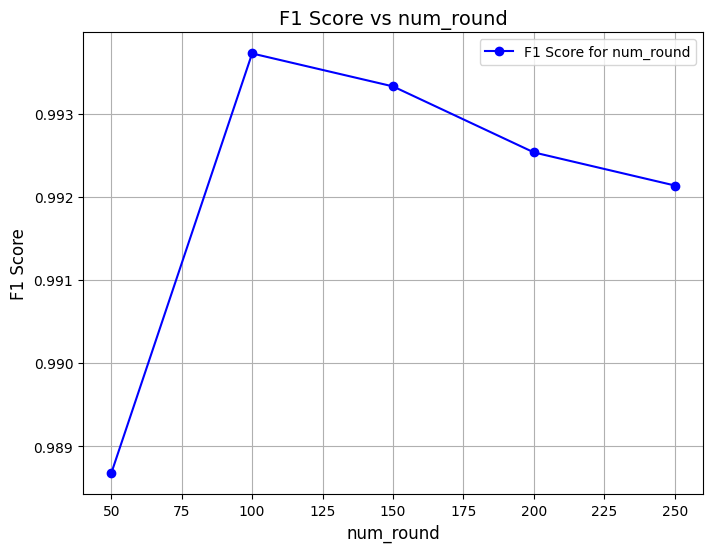


Evaluating parameter: learning_rate
learning_rate = 0.1, F1 Score = 0.994
learning_rate = 0.5, F1 Score = 0.993
learning_rate = 0.6, F1 Score = 0.992
learning_rate = 0.7, F1 Score = 0.992
learning_rate = 0.8, F1 Score = 0.992
learning_rate = 0.9, F1 Score = 0.993


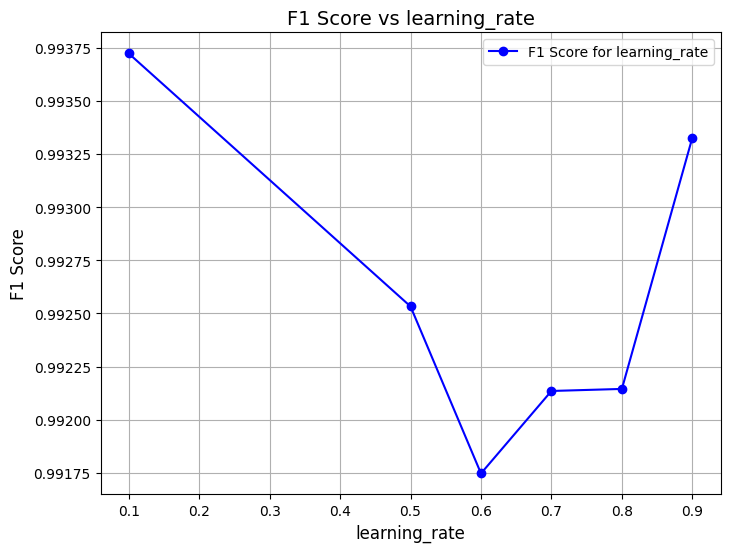

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from minisom import MiniSom

# Load Dataset
dataset = pd.read_csv('Dataset.csv')

# Define the target variable
y = data['Legitimacy']

selected_features = ['Longitude', 'Latitude', 'Hour']  # Replace with actual selected features from Q3
best_features = ['Longitude', 'Latitude']
X = data[selected_features]
X_best = data[best_features]

# Split the data based on 'Day' column
train_data = data[data['Day'] <= 4]
test_data = data[(data['Day'] >= 5) & (data['Day'] <= 6)]

X_train = train_data[selected_features]
X_best_train = train_data[best_features]
y_train = train_data['Legitimacy']

X_test = test_data[selected_features]
X_best_test = test_data[best_features]
y_test = test_data['Legitimacy']

# Function to train SOFM
def train_sofm(X_best_train, grid_size):
    input_dim = X_best_train.shape[1]
    sofm = MiniSom(grid_size, grid_size, input_dim, sigma=1.0, learning_rate=0.5, random_seed=0)
    sofm.random_weights_init(X_best_train.values)
    sofm.train_random(X_best_train.values, 1000)

    # Generate features for both training and test data
    train_sofm_features = np.array([sofm.winner(x) for x in X_best_train.values])
    return train_sofm_features, sofm

# Modify how features are concatenated in the XGBoost evaluation function
def evaluate_xgboost(param_name, param_values):
    f1_scores = []
    print(f"\nEvaluating parameter: {param_name}")
    for value in param_values:
        params = {"n_estimators": 100, "random_state": 0, "learning_rate": 0.1, "max_depth": 6}
        if param_name == "num_round":
            params["n_estimators"] = value
        else:
            params[param_name] = value

        model = XGBClassifier(**params)

        # Train SOFM and PKI-enhanced model
        sofm_features, sofm = train_sofm(X_best_train, 4)

        # Concatenate SOFM features to both the training and test sets
        X_pki_train = np.hstack((X_train.values, sofm_features))
        X_pki_test = np.hstack((X_test.values, np.array([sofm.winner(x) for x in X_best_test.values])))

        # Fit and predict
        model.fit(X_pki_train, y_train)
        y_pred = model.predict(X_pki_test)

        # Calculate F1 score
        score = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(score)
        print(f"{param_name} = {value}, F1 Score = {score:.3f}")

    return param_values, f1_scores


# Plot results
def plot_results(param_name, param_values, f1_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(param_values, f1_scores, marker='o', color='b', label=f'F1 Score for {param_name}')
    plt.title(f"F1 Score vs {param_name}", fontsize=14)
    plt.xlabel(param_name, fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Define parameters to fine-tune
param_ranges = {
    "max_depth": [3, 6, 9],  # Lower, default, higher values
    "num_round": [50, 100, 150,200,250],  # Lower, default, higher values
    "learning_rate": [0.1, 0.5,0.6, 0.7,0.8,0.9],  # Lower, default, higher values
}

# Fine-tuning for each parameter
for param_name, param_values in param_ranges.items():
    values, scores = evaluate_xgboost(param_name, param_values)
    plot_results(param_name, values, scores)
